### <center>TIPS Dataset - Exploratory Analysis </center> ###

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#getting data from PyLadiesSP github
url = 'https://raw.githubusercontent.com/PyLadiesSP/data-science/master/Oficinas/oficina_introdu%C3%A7%C3%A3o_estatistica_pandas/tips.csv'
df = pd.read_csv(url)
df = np.round(df, decimals=2)

In [3]:
df.head()

,total_conta,gorjeta,genero,fumante,dia,horario,pessoas_mesa,tempo_permanencia
0,16.99,1.01,Feminino,nao,dom,jantar,2,41
1,10.34,1.66,Masculino,nao,dom,jantar,3,40
2,21.01,3.50,Masculino,nao,dom,jantar,3,49
3,23.68,3.31,Masculino,nao,dom,jantar,2,43
4,24.59,3.61,Feminino,nao,dom,jantar,4,34


In [4]:
#checking kind of data + NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_conta        244 non-null    float64
 1   gorjeta            244 non-null    float64
 2   genero             244 non-null    object 
 3   fumante            244 non-null    object 
 4   dia                244 non-null    object 
 5   horario            244 non-null    object 
 6   pessoas_mesa       244 non-null    int64  
 7   tempo_permanencia  244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [5]:
#Checking data
np.round(df.describe(), decimals=2)

,total_conta,gorjeta,pessoas_mesa,tempo_permanencia
count,244.00,244.00,244.00,244.00
mean,19.79,3.00,2.57,40.26
std,8.90,1.38,0.95,5.16
min,3.07,1.00,1.00,26.00
25%,13.35,2.00,2.00,37.00
50%,17.80,2.90,2.00,40.00
75%,24.13,3.56,3.00,44.00
max,50.81,10.00,6.00,53.00


#### Understand total bills versus other variables ####

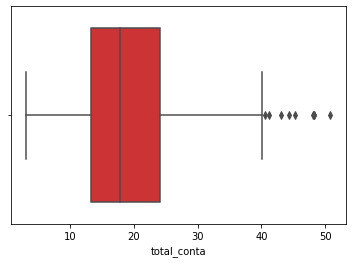

In [6]:
sns.boxplot(x=df["total_conta"], palette="Set1");

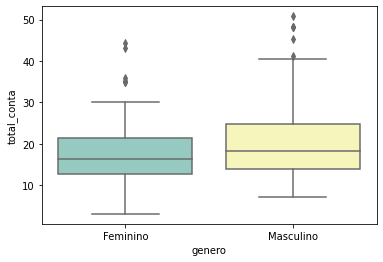

In [7]:
sns.boxplot(x="genero", y="total_conta", data=df, palette="Set3");

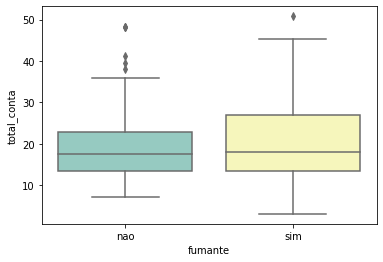

In [8]:
sns.boxplot(x="fumante", y="total_conta", data=df, palette="Set3");

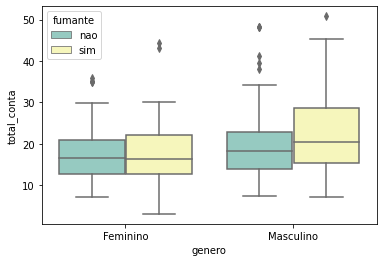

In [9]:
sns.boxplot(x="genero", y="total_conta", hue="fumante",data=df, palette="Set3");

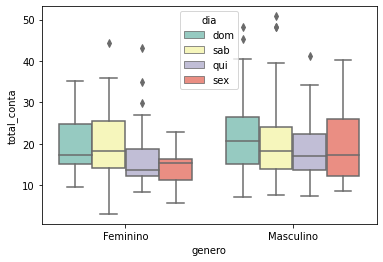

In [10]:
sns.boxplot(x="genero", y="total_conta", hue="dia",data=df, palette="Set3");

In [11]:
df.groupby(['genero', 'dia'])['total_conta'].mean().reset_index()

,genero,dia,total_conta
0,Feminino,dom,19.872222
1,Feminino,qui,16.715312
2,Feminino,sab,19.680357
3,Feminino,sex,14.145556
4,Masculino,dom,21.887241
5,Masculino,qui,18.714667
6,Masculino,sab,20.802542
7,Masculino,sex,19.857000


#### Understand tips versus other variables ####

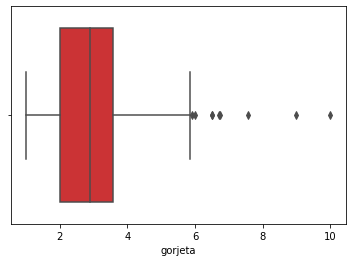

In [12]:
sns.boxplot(x=df["gorjeta"], palette="Set1");

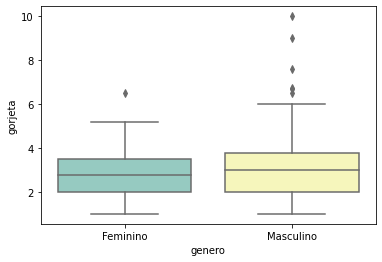

In [13]:
sns.boxplot(x="genero", y="gorjeta", data=df, palette='Set3');

In [14]:
df.groupby('genero')['gorjeta'].median()

genero
Feminino     2.75
Masculino    3.00
Name: gorjeta, dtype: float64

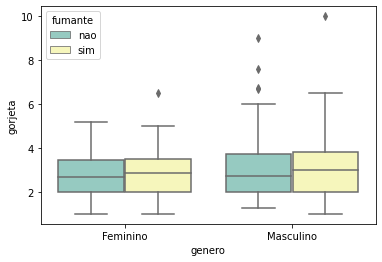

In [15]:
sns.boxplot(x="genero", y="gorjeta", hue="fumante",data=df, palette="Set3");

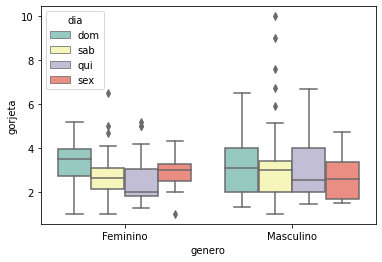

In [16]:
sns.boxplot(x="genero", y="gorjeta", hue="dia",data=df, palette="Set3");

In [17]:
df.groupby(['genero', 'dia'])['total_conta'].mean().reset_index()

,genero,dia,total_conta
0,Feminino,dom,19.872222
1,Feminino,qui,16.715312
2,Feminino,sab,19.680357
3,Feminino,sex,14.145556
4,Masculino,dom,21.887241
5,Masculino,qui,18.714667
6,Masculino,sab,20.802542
7,Masculino,sex,19.857000


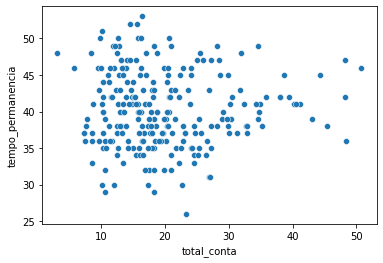

In [18]:
sns.scatterplot(x='total_conta', y='tempo_permanencia', data=df);

#### Understand time versus other variables ####

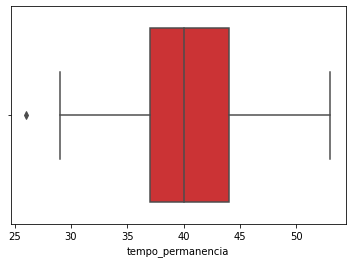

In [19]:
sns.boxplot(x=df["tempo_permanencia"], palette="Set1");

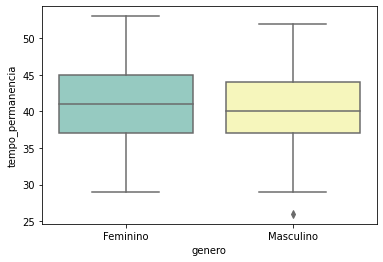

In [20]:
sns.boxplot(x="genero", y="tempo_permanencia", data=df, palette='Set3');

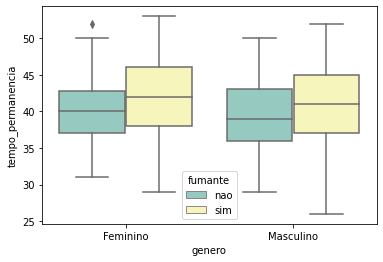

In [21]:
sns.boxplot(x="genero", y="tempo_permanencia", hue="fumante",data=df, palette="Set3");

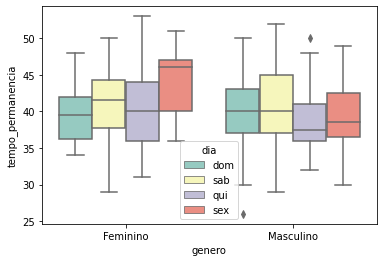

In [22]:
sns.boxplot(x="genero", y="tempo_permanencia", hue="dia",data=df, palette="Set3");

In [23]:
df.groupby(['dia'])['tempo_permanencia'].mean().reset_index()

,dia,tempo_permanencia
0,dom,39.789474
1,qui,40.000000
2,sab,40.586207
3,sex,41.526316


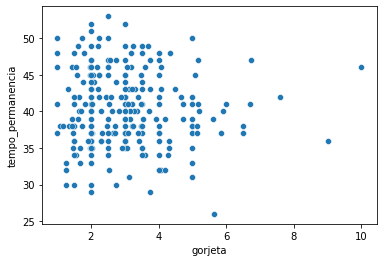

In [24]:
sns.scatterplot(x='gorjeta', y='tempo_permanencia', data=df);

### Categoric Variables ###

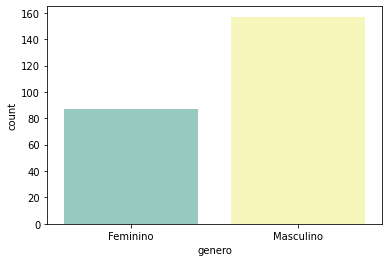

In [25]:
sns.countplot(x='genero', data=df, palette='Set3');

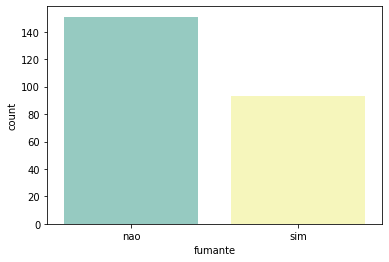

In [26]:
sns.countplot(x='fumante', data=df, palette='Set3');

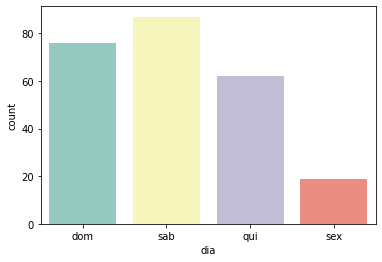

In [27]:
sns.countplot(x='dia', data=df, palette='Set3');

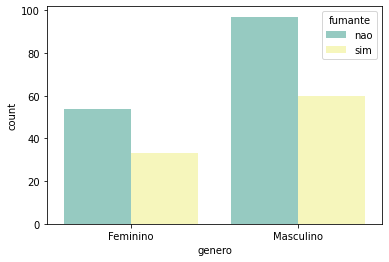

In [28]:
sns.countplot(x='genero', data=df, hue='fumante', palette='Set3');

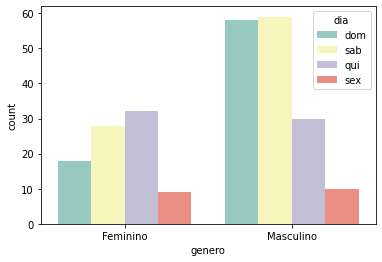

In [29]:
sns.countplot(x='genero', data=df, hue='dia', palette='Set3');

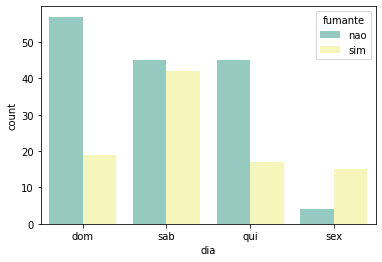

In [30]:
sns.countplot(x='dia', data=df, hue='fumante', palette='Set3');

### Hypothesis Test ###

Does time follows a normal distribuition?

h0 = yes </p>
h1 = no

In [31]:
data = np.array(df.tempo_permanencia)
size = len(df.tempo_permanencia)

In [32]:
def quantile_plot(data: np.ndarray, sample_size: int):
    plot = np.zeros([sample_size, 2])
    np.random.shuffle(data)
    plot[:, 0] = np.sort(data[0: sample_size])
    plot[:, 1] = np.sort(np.random.normal(size=sample_size))
    return plot

Text(0.5, 1.0, 'Hypothesis Test')

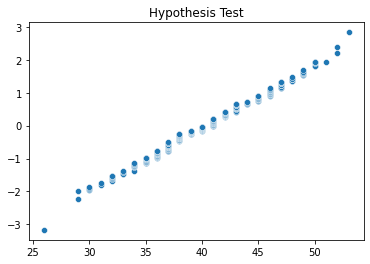

In [33]:
q_plot = quantile_plot(df.tempo_permanencia.copy(), len(df.tempo_permanencia))
sns.scatterplot(x=q_plot[:, 0], y=q_plot[:, 1])
plt.title('Hypothesis Test')

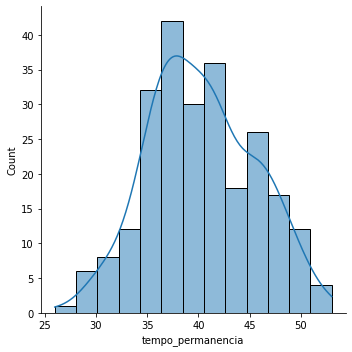

In [34]:
sns.displot(x="tempo_permanencia", data=df, kde=True);

Time does not follow a normal distribution